In [ ]:
import time
import matplotlib.pyplot as plt
import pandas as pd
import copy
import random

In [ ]:
def minIncrementForUniqueIteratif(nums: list[int]) -> int:
    moves = 0

    for i in range(1, len(nums)):
        # Memastikan nilai index saat ini lebih besar dibandingkan inndex sebelumnya, jika tidak maka nilai index saat ini akan ditingkatkan
        if nums[i] <= nums[i - 1]:
            # Menambahkan banyak langkah untuk membuat satu elemen menjadi unik
            moves += nums[i - 1] + 1 - nums[i]
            # Mengubah nilai elemen menjadi lebih besar dari sebelumnya
            nums[i] = nums[i - 1] + 1

    return moves

In [ ]:
def minIncrementForUniqueRecursion(index: int, prev: int, moves: int, nums: list[int]) -> int:
        # Base Case: jika index == banyak elemen array
        if index == len(nums):
            return moves

        # Memastikan nilai index saat ini lebih besar dibandingkan inndex sebelumnya, jika tidak maka nilai index saat ini akan ditingkatkan
        if nums[index] <= prev:
            # Menambahkan banyak langkah untuk membuat satu elemen menjadi unik
            moves += prev + 1 - nums[index]
            # Mengubah nilai elemen menjadi lebih besar dari sebelumnya
            nums[index] = prev + 1

        # Recursion Case untuk elemen berikutnya
        return minIncrementForUniqueRecursion(index + 1, nums[index], moves, nums)

In [ ]:
def generate_test_case_with_duplicates(size):
    base = []
    # Generate list yang memiliki elemen yang didupilkat 2 kali
    for _ in range(size // 2):
        num = random.randint(0, 1000)  # Generate angka random
        base.extend([num, num])  # Setiap angka muncul dua kali (elemen duplikat)

    base.sort()  # Sort array dalam urutan membesar
    return base

In [ ]:
# Ukuran input: 2 hingga 500 dengan kenaikan 2
input_sizes = list(range(2, 500, 2))
Waktu_Iteratif = []
Waktu_Rekursif = []

# Buat test cases
test_cases = [generate_test_case_with_duplicates(size) for size in input_sizes]

for i, case in enumerate(test_cases):
    case_Iteratif = copy.deepcopy(case)
    case_Rekursif = copy.deepcopy(case)

    start_time = time.time() #penghitungan waktu eksekusi
    move_Iteratif = minIncrementForUniqueIteratif(case_Iteratif)
    end_time = time.time() #penghitungan waktu eksekusi
    Waktu_Iteratif.append(end_time - start_time)


    start_time = time.time() #penghitungan waktu eksekusi
    move_Rekursif = 0
    move_Rekursif = minIncrementForUniqueRecursion(1, case_Rekursif[0], 0, case_Rekursif)
    end_time = time.time() #penghitungan waktu eksekusi
    Waktu_Rekursif.append(end_time - start_time)

    # print("Iteratif:", move_Iteratif)
    # print("Recursive:", move_Rekursif)

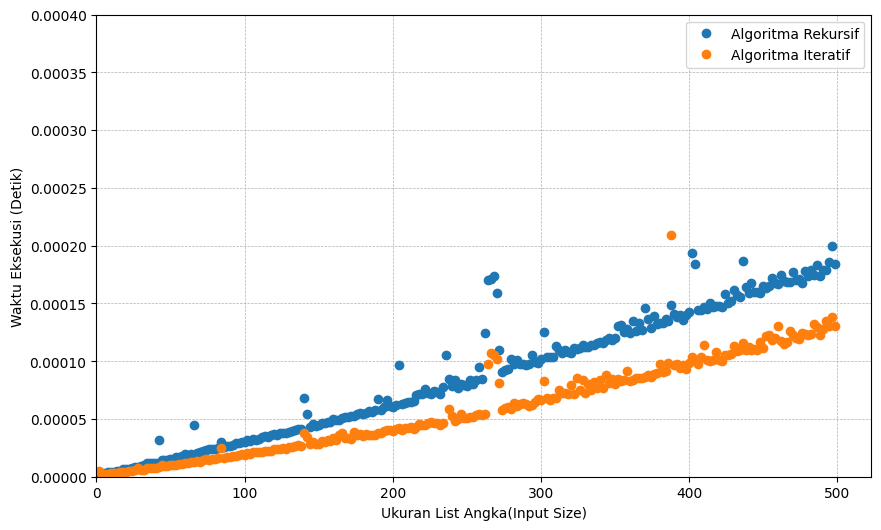

In [ ]:
plt.figure(figsize=(10, 6))
plt.plot(input_sizes, Waktu_Rekursif, 'o', label="Algoritma Rekursif")
plt.plot(input_sizes, Waktu_Iteratif, 'o', label="Algoritma Iteratif")
plt.xscale("linear")
plt.yscale("linear")
plt.xlabel("Ukuran List Angka(Input Size)")
plt.ylabel("Waktu Eksekusi (Detik)")
plt.ylim(0, 0.0004)
plt.xlim(0)
plt.legend()
plt.grid(True, linestyle="--", linewidth=0.5)
plt.show()